In [423]:
import pandas as  pd 
import numpy as np 
import matplotlib.pyplot as plt 
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import  XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score , average_precision_score 
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [424]:
data = pd.read_csv("churn_data.csv")
data.shape


(7043, 28)

In [425]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Tenure_bucket,avg_monthly_spend,Early_high_risk,life_time_risk_score,Service_count,Price_shook,customer_value
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,No,new,29.85,0.0,1.000,2,0.00,0.06
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.50,No,loyal,55.57,0.0,0.125,4,1.38,7.75
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,new,54.08,0.0,0.500,4,-0.23,0.43


In [426]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_bucket', 'avg_monthly_spend', 'Early_high_risk',
       'life_time_risk_score', 'Service_count', 'Price_shook',
       'customer_value'],
      dtype='object')

In [427]:
data.drop(['customerID', 'gender','PhoneService', 'MultipleLines',
           'StreamingTV', 'StreamingMovies', 'Partner', 'Dependents'] , axis = 1 , inplace = True)


In [428]:
data.shape

(7043, 20)

In [429]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SeniorCitizen         7043 non-null   int64  
 1   tenure                7043 non-null   int64  
 2   InternetService       7043 non-null   object 
 3   OnlineSecurity        7043 non-null   object 
 4   OnlineBackup          7043 non-null   object 
 5   DeviceProtection      7043 non-null   object 
 6   TechSupport           7043 non-null   object 
 7   Contract              7043 non-null   object 
 8   PaperlessBilling      7043 non-null   object 
 9   PaymentMethod         7043 non-null   object 
 10  MonthlyCharges        7043 non-null   float64
 11  TotalCharges          7032 non-null   float64
 12  Churn                 7043 non-null   object 
 13  Tenure_bucket         7043 non-null   object 
 14  avg_monthly_spend     7043 non-null   float64
 15  Early_high_risk      

In [430]:
data.head(4)

,SeniorCitizen,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_bucket,avg_monthly_spend,Early_high_risk,life_time_risk_score,Service_count,Price_shook,customer_value
0,0,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,new,29.85,0.0,1.000,2,0.00,0.06
1,0,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No,loyal,55.57,0.0,0.125,4,1.38,7.75
2,0,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,new,54.08,0.0,0.500,4,-0.23,0.43
3,0,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No,loyal,40.91,0.0,0.125,4,1.39,7.61


## Encoding 

Checking for unique elements in Column

In [431]:
def to_check(cols):
    if cols in data.columns :
        return data[cols].unique()
    else:
        return f"{[cols]} not found"

        
print(to_check("OnlineSecurity"))
print(to_check("OnlineBackup"))
print(to_check( "DeviceProtection"))
print(to_check("TechSupport"))
print(to_check("PaperlessBilling"))

['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No']


### Target Encoding

In [432]:
data["Churn"] = data["Churn"].map({"Yes" : 1 , "No" : 0}).astype(int)

#### Binary Categorical Encoding

In [433]:

binary_cols=["OnlineSecurity" , "OnlineBackup" , "DeviceProtection" , "TechSupport" , "PaperlessBilling"]

for cols  in binary_cols :
    if cols in data.columns : 
        data[cols] = data[cols].map({"Yes" : 1 , "No" : 0 ,"No internet service" : 0}).astype(int)


Checking for unique elements in Column

In [434]:
def to_check(cols):
    if cols in data.columns :
        return data[cols].unique()
    else:
        return f"{[cols]} not found"
print(to_check("InternetService"))
print(to_check( "Contract"))
print(to_check( "DeviceProtection"))
print(to_check( "Tenure_bucket"))


['DSL' 'Fiber optic' 'No']
['Month-to-month' 'One year' 'Two year']
[0 1]
['new' 'loyal' 'Mid' 'long']


#### Multi-Class Encoding

In [435]:
## Multi class Encoding 

multiclass_cols = ["InternetService" , "Contract" , "PaymentMethod" , "Tenure_bucket"]

data = pd.get_dummies (
    data , columns = [cols for cols in multiclass_cols if cols in data.columns] , drop_first = True
)

In [436]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   OnlineSecurity                         7043 non-null   int32  
 3   OnlineBackup                           7043 non-null   int32  
 4   DeviceProtection                       7043 non-null   int32  
 5   TechSupport                            7043 non-null   int32  
 6   PaperlessBilling                       7043 non-null   int32  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int32  
 10  avg_monthly_spend                      7043 non-null   float64
 11  Earl

#### Boolean Feature Encoding (True/False → 0/1)

In [437]:
bool_cols = data.select_dtypes(include="bool").columns

data[bool_cols] = data[bool_cols].astype(int)

#### Numeric Type Enforcement & Missing Value Imputation

In [438]:
data = data.apply(pd.to_numeric, errors="coerce")

data.fillna(data.median(numeric_only=True), inplace=True)

In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   OnlineSecurity                         7043 non-null   int32  
 3   OnlineBackup                           7043 non-null   int32  
 4   DeviceProtection                       7043 non-null   int32  
 5   TechSupport                            7043 non-null   int32  
 6   PaperlessBilling                       7043 non-null   int32  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int32  
 10  avg_monthly_spend                      7043 non-null   float64
 11  Earl

### Feature–Target Separation

In [440]:
x = data.drop(["Churn"] , axis= 'columns')

y = data["Churn"]

### Stratified Train–Test Split

In [441]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


### End-to-End Modeling Pipeline with Scaling, SMOTE & XGBClassifier

In [442]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("model",   XGBClassifier(n_estimators=300,max_depth=4,learning_rate=0.05,subsample=0.8,colsample_bytree=0.8,objective="binary:logistic",
                              eval_metric="auc", random_state=42))
    
])


In [443]:
pipeline.fit(x_train, y_train)

,steps,"[('scaler', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,objective,'binary:logistic'


### Probability Prediction for Positive (Churn) Class

-- Returns predicted class probabilities for each customer

In [444]:
y_proba = pipeline.predict_proba(x_test)[:, 1]

#### Optimal Classification Threshold Tuning Using F1-Score

--This block finds the best probability threshold for converting churn probabilities into final 0/1 predictions, optimized for F1-score.

In [445]:
thresholds = np.linspace(0.2, 0.6, 100)
f1s = []


In [446]:
for t in thresholds:
    y_pred = (y_proba > t).astype(int)
    f1s.append(f1_score(y_test, y_pred))

best_threshold = thresholds[np.argmax(f1s)]
best_threshold

0.3939393939393939

#### Final Churn Prediction Using Optimized Probability Threshold

In [447]:
y_pred_opt = (y_proba > best_threshold).astype(int)

In [448]:
print(classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1035
           1       0.53      0.75      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



In [449]:
print("THE ROC-AUC Score is :", roc_auc_score(y_test, y_proba))

THE ROC-AUC Score is : 0.8384290475083314


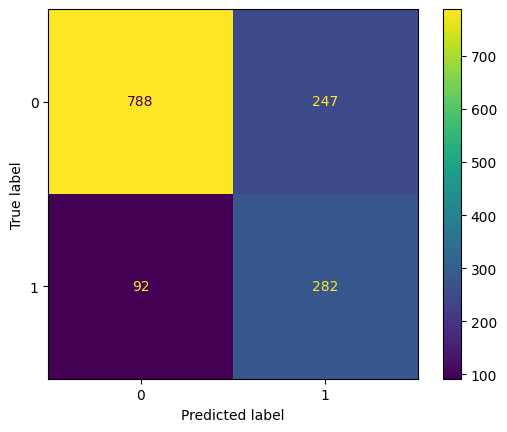

In [450]:
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test,y_pred_opt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [451]:
print (f"The average precision Score is : {average_precision_score(y_test, y_proba)}")

The average precision Score is : 0.6571487279222084


### Model Evaluation Report: ROC-AUC Score

-- ROC-AUC Mean Score: 0.838 | Std Dev: 0.006
   The model shows good discrimination between churned and non-churned customers with stable performance across folds.

In [452]:
cv = StratifiedKFold(5, shuffle=True, random_state=42)

roc_scores = cross_val_score(pipeline, x, y, scoring="roc_auc", cv=cv)

In [453]:
print (f"The ROC Mean Score is {roc_scores.mean()}  and the ROC Standard Deviation {roc_scores.std()}")

The ROC Mean Score is 0.8382673401380106  and the ROC Standard Deviation 0.006730084989448815


# Prediction 

In [454]:
feature_columns = x.columns.tolist()
feature_columns

['SeniorCitizen',
 'tenure',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'avg_monthly_spend',
 'Early_high_risk',
 'life_time_risk_score',
 'Service_count',
 'Price_shook',
 'customer_value',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Tenure_bucket_long',
 'Tenure_bucket_loyal',
 'Tenure_bucket_new']

In [455]:
customer_input = {
    'SeniorCitizen': 0,
    'tenure': 6,
    'OnlineSecurity': 0,
    'OnlineBackup': 1,
    'DeviceProtection': 0,
    'TechSupport': 0,
    'PaperlessBilling': 1,
    'MonthlyCharges': 89.75,
    'TotalCharges': 520.30,
    'avg_monthly_spend': 86.72,
    'Early_high_risk': 1,
    'life_time_risk_score': 0.78,
    'Service_count': 3,
    'Price_shook': 1,
    'customer_value': 1.56,
    'InternetService_Fiber optic': 1,
    'InternetService_No': 0,
    'Contract_One year': 0,
    'Contract_Two year': 0,
    'PaymentMethod_Credit card (automatic)': 0,
    'PaymentMethod_Electronic check': 1,
    'PaymentMethod_Mailed check': 0,
    'Tenure_bucket_long': 0,
    'Tenure_bucket_loyal': 0,
    'Tenure_bucket_new': 1
}


In [456]:
def predict_churn(pipeline, customer_input, feature_columns):

    df = pd.DataFrame([customer_input])
    df = df[feature_columns]

    
    for col in feature_columns:
        if col not in df.columns:
            df[col] = 0

            
    return {
        "prediction": int(pipeline.predict(df)[0]),
        "probability": pipeline.predict_proba(df)[0][1]*100  }


In [457]:
print(predict_churn(pipeline, customer_input, feature_columns))

{'prediction': 1, 'probability': 89.50236439704895}
